Cluster Assignments:
Point 1: Cluster 2
Point 2: Cluster 2
Point 3: Cluster 2
Point 4: Cluster 2
Point 5: Cluster 1
Point 6: Cluster 3
Point 7: Cluster 1
Point 8: Cluster 3
Point 9: Cluster 2
Point 10: Cluster 2
Point 11: Cluster 1
Point 12: Cluster 3

Final Centroids:
Cluster 1: [5.1 5.4 4.8 5.9]
Cluster 2: [1.48333333 1.71666667 1.21666667 2.15      ]
Cluster 3: [5.4 5.7 5.1 6.2]

WCSS: 2.2600

Reducing to 2D using PCA for visualization...


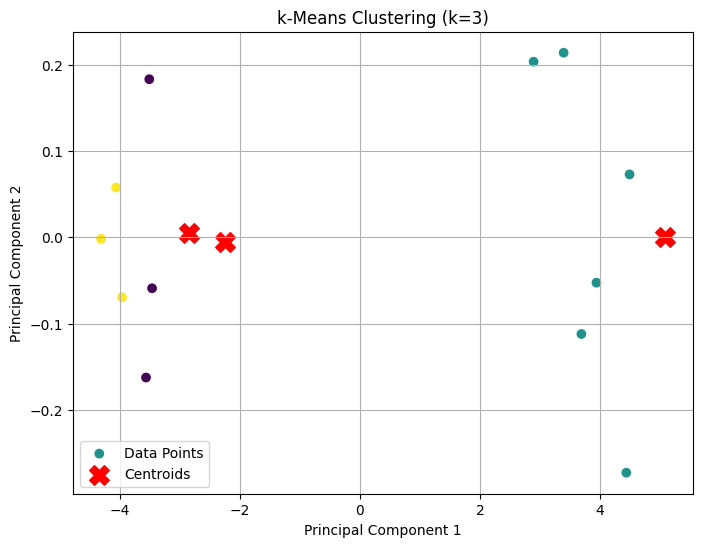

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(data, k=2, max_iter=100):
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iter):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    wcss = sum(np.sum((data[clusters == i] - centroids[i])**2) for i in range(k))

    return clusters, centroids, wcss

def pca(X, n_components=2):
    X_mean = X - np.mean(X, axis=0)
    cov = np.cov(X_mean, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_idx]
    components = eigenvectors[:, :n_components]
    return np.dot(X_mean, components)

data = np.array([
    [1.0, 1.5, 0.8, 2.0],
    [1.5, 1.8, 1.2, 2.3],
    [1.2, 1.3, 0.9, 1.8],
    [1.4, 1.7, 1.1, 2.1],
    [5.0, 5.5, 4.8, 6.0],
    [5.5, 5.8, 5.2, 6.3],
    [5.2, 5.3, 4.9, 5.8],
    [5.4, 5.7, 5.1, 6.1],
    [2.0, 2.1, 1.8, 2.5],
    [1.8, 1.9, 1.5, 2.2],
    [5.1, 5.4, 4.7, 5.9],
    [5.3, 5.6, 5.0, 6.2]
])

k = 3
clusters, centroids, wcss = k_means(data, k)

print("Cluster Assignments:")
for i, point in enumerate(data):
    print(f"Point {i+1}: Cluster {clusters[i]+1}")

print("\nFinal Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

print(f"\nWCSS: {wcss:.4f}")

if data.shape[1] > 2:
    print("\nReducing to 2D using PCA for visualization...")
    data_2d = pca(data)
    centroids_2d = pca(centroids)
else:
    data_2d = data
    centroids_2d = centroids

plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='viridis', label='Data Points')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1' if data.shape[1] > 2 else 'Feature 1')
plt.ylabel('Principal Component 2' if data.shape[1] > 2 else 'Feature 2')
plt.title(f'k-Means Clustering (k={k})')
plt.legend()
plt.grid(True)
plt.show()